<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/2025_1s/TIC/Aula_07_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


# **Problemas de Regressão**

Problemas de regressão consistem em modelar uma relação (linear ou não-linear) entre uma variável dependente (variável de saída) e uma ou mais variáveis independentes (variáveis de entrada). O que difere problemas de regressão para os problemas de classificação é que, agora, buscamos prever um valor contínuo (e não valores 0 ou 1 representando classes).

Os modelos de regressão têm uma ampla gama de aplicações em diversas áreas, tais como:

- Estudo da relação entre a renda e a educação.
- Análise do impacto de tratamentos médicos em resultados de pacientes.
- Estimativa de vendas com base em despesas com publicidade.
- Análise da relação entre velocidade e consumo de combustível em veículos.
- Previsão de níveis de água em rios com base em dados meteorológicos.

# **Regressão Linear**

Em estatística, Regressão Linear é uma equação que se usa para estimar o valor esperado de uma variável, $y$ (chamada variável dependente), a partir de uma função linear dos valores de outras variáveis $x_1, x_2,...,x_m$ (as variáveis independentes).

Antes de utilizar um modelo de regressão linear, é importante avaliar a relação linear entre as variáveis de interesse. Para isso, é possível empregar gráficos de dispersão (*scatterplots*) e calcular o coeficiente de correlação.

## Exemplo - Sales/Marketing

Para aprender os conceitos desta aula de Regressão Linear, vamos usar o conjunto de dados [Advertising](https://www.kaggle.com/datasets/ashydv/advertising-dataset). Nesse conjunto de dados, o objetivo consiste em estimar o número de vendas (*Sales*) com base no orçamento destinado à publicidade para três mídias: *TV*, *Radio* e *Newspaper*.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Como uma primeira análise, podemos visualizar a relação entre as variáveis através de gráficos de dispersão.

**Lembre-se**: Gráficos de disperssão (*scatterplot*) são ferramentas úteis na análise de dados para visualizar a relação entre duas variáveis.

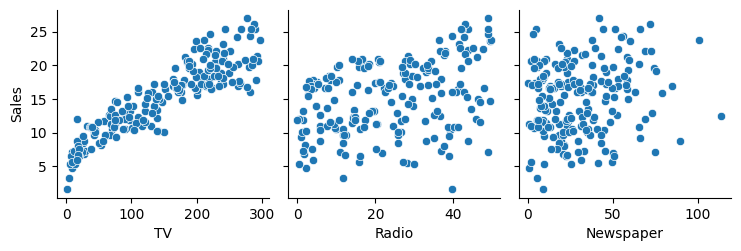

In [2]:
# Gráficos de dispersão

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,
             x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars='Sales',
             kind='scatter')
plt.show()

Além dos gráficos, podemos calcular o coeficiente de correlação entre as variáveis.

**Lembre-se**: O coeficiente de correlação ($r$) mede a força linear entre as variáveis independentes e dependentes. Seu valor varia de -1 a 1, de tal forma que:

- Um valor de $r$ próximo a 1 indica que à medida que uma variável aumenta, a outra também tende a aumentar.
- Um valor de $r$ próximo a -1 indica que à medida que uma variável aumenta, a outra tende a diminuir.
- Um valor de $r$ próximo a 0 indica uma correlação linear fraca ou inexistente entre as variáveis.

In [3]:
# Correlação linear

df.corr()[["Sales"]]

,Sales
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


Tanto visualmente quanto verificado pelo coeficiente de correlação, podemos assumir que a variável *Sales* está relacionada linearmente com a variável *TV*. Por outro lado, *Radio* e *Newspaper* não possui uma relação tão forte com *Sales*.

Provavelmente, em um moelo de Regressão Linear, o uso da variável *TV* teria um impacto maior que as demais variáveis ao predizer o número de vendas. Vamos analisar essas hipóteses implementando o modelo de Regressão Linear.

## Regressão Linear Simples

A Regressão Linear Simples permite modelar a relação entre duas variáveis, uma sendo a variável resposta $y$ e a outra sendo preditora ou explicativa. Essa técnica assume uma relação linear entre as variáveis, a qual pode ser aproximada pela seguinte equação:

$$y_i=\beta_0 + \beta_1 x_i + ϵ_i,$$

em que $i = 1, \cdots, n$ indica uma amostra no conjunto de $n$ dados, $y_i$ é a variável que tentamos prever, $x_i$ é variável explicativa, $\beta_0$ é o intercepto; $\beta_1$ é o coeficiente angular e $\epsilon$ o erro.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_regr_linear.png'>



Note que para criar a reta de regressão é preciso considerar todos os dados (ou amostras $i = 1, \cdots, n$) disponíveis para `treinar` o modelo. E, para o conjunto das amostras, o objetivo é de encontrar os valores ideais para os parâmetros $\beta_0$ e $\beta_1$ de tal forma que o erro total seja minimizado.

Note que a simples soma dos erros, isto é, $\sum_{i=1}^{n} \epsilon_i$, pode resultar em um valor próximo de zero. Isso porque os erros $\epsilon_i$ podem ser tanto positivos quanto negativos, e na soma um erro positivo "pode compensar" um erro negativo. Sendo assim, um método que pode ser adotado para encontrar os valores ótimos de $\beta_0$ e $\beta_1$, chamado de Mínimos Quadrados Ordinários (MQO) ou OLS (do inglês Ordinary Least Squares), consiste em resolver o seguinte problema de otimização:

$$OLS(\beta_0, \beta_1)=\min_{\beta_0, \beta_1} \sum_{i=1}^{n} \epsilon^2_i = \min_{\beta_0, \beta_1} \sum_{i=1}^{n}(y_i -\beta_0 - \beta_1 x_i )^2.$$

em que $\epsilon_i$ é a diferença entre os valores observados ($y_i$) e previstos a partir do modelo linear ($\beta_0 + \beta_1 x_i$).

A solução desse problema de otimização é bem conhecida. A partir das derivadas parciais em relação a $\beta_0$ e $\beta_1$ utilizando a regra da cadeia e igualando ambas expressões à zero, podemos encontrar os valores de $\beta_0$ e $\beta_1$ que minimizam $OLS(\beta_0, \beta_1)$, isto é, a soma do quadrados dos erros.

Nesta aula, usaremos a biblioteca `statsmodels` para estimar esses parâmetros.

**Ajustando os parâmetros**

Vamos ajustar um modelo de regressão para analisar as vendas (*Sales*) utilizando apenas *TV* como variável preditora.

In [4]:
# Fit the resgression line using 'OLS'

import statsmodels.formula.api as sm

model = sm.ols(formula='Sales ~ TV', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Thu, 29 May 2025   Prob (F-statistic):           7.93e-74
Time:                        20:26:44   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

O modelo de regressão obtido foi o seguinte:

$$\widehat{y} = 6.9748 + 0.055TV, $$

em que $\widehat{y}$ é a venda (`Sales`) esperada quando é investido um certo dinheiro de marketing em TV.

- Note que o valor-p (P>|t|) para a variável `TV` é 0.000 ($<$0.05). Isso indica que o orçamento destinado à publicidade em TV influencia, estatísticamente, nas vendas.

- Note que o `R-squared` é de 0.812. O que isso significa?

*Relembrando*:

- O `valor-p` associado ao coeficiente testa a hipótese nula de que tal coeficiente é igual a zero, ou seja, que o mesmo não tem efeito na variável predita. Então, um valor-p baixo (geralmente, < 0,05) indica que podemos rejeitar a hipótese nula. Isso significa que uma variável preditora que possui um valor-p baixo provavelmente terá uma contribuição significativa no modelo, uma vez que alterações no valor dessa variável preditora estão relacionadas a alterações na variável predita.

- `O coeficiente de determinação` (`R-squared`, ou $R^2$) é uma medida que indica o quanto a variabilidade da variável dependente é explicada pelas variáveis independentes em um modelo de regressão linear. O $R^2$ varia entre 0 e 1.

**Valores previstos pelo modelo de regressão!**

Como construir a reta de regressão?
Podemos calcular os valores preditos usando o modelo $6.9748+ 0.055TV$ substituindo cada valor de $x$ pelo valor observado.

In [5]:
df['predicted'] = model.predict(df.TV)
df.head()

,TV,Radio,Newspaper,Sales,predicted
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852


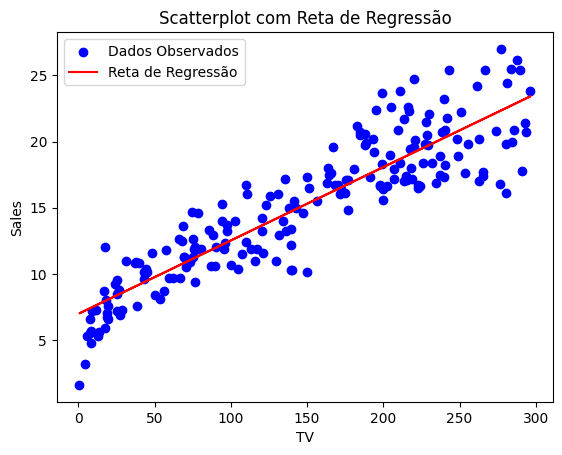

In [6]:
# Scatterplot com Reta de Regressão

plt.scatter(df.TV, df.Sales, color='blue', label='Dados Observados')
plt.plot(df.TV, df.predicted, color='red', label='Reta de Regressão')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatterplot com Reta de Regressão')
plt.legend()
plt.show()

**Prevendo um novo valor pelo modelo de regressão!**

Usando o modelo de regressão linear ajustado, qual é o valor de vendas (`Sales`) esperado quando o orçamento em TV é de 153?

In [7]:
# Prevendo para novos valores (não estão na base de dados)

new_value=pd.DataFrame({'TV': [153]})

model.predict(new_value)

,0
0,15.460931


In [8]:
# Obtendo os intervalos de confiança de 95% para as previsões

model.get_prediction(new_value).conf_int()

array([[15.14003275, 15.78182999]])

**Interpretando os parâmetros**

A interpretação dos parâmetros da Regressão Linear é bem fácil. Basicamente, a alteração no valor predito com o aumento em uma unidade na variável preditora é equivalente ao parâmetro associado a tal variável. No exemplo das vendas, se ao invés de 153 como orçamento para TV tivéssemos 154, o aumento no número de vendas teria um incremento de 0,055 (o valor de $\beta$ que multiplica o orçamento em TV).

Verifique o resultado com esse novo dado.

In [9]:
# Interpretando os parâmetros

new_value=pd.DataFrame({'TV': [154]})

model.predict(new_value)

,0
0,15.516396


**Análise de resíduos**

Um pressuposto que geralmente deve ser verificado nos modelos de regressão é que os resíduos devem ser aleatórios com média zero e seguir aproximadamente uma distribuição Normal. Quando essas suposições são satisfeitas, isso sugere que o modelo de regressão linear é apropriado para descrever a relação entre as variáveis.

In [10]:
# Resíduos

residuals = model.resid_pearson

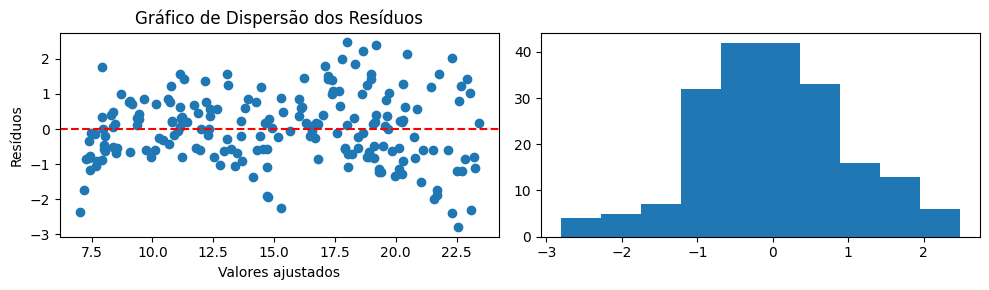

In [11]:
# Gráfico de dispersão dos resíduos

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(df["predicted"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals)

plt.tight_layout()
plt.show()

Esses gráficos sugerem que os resíduos se desenvolvem aleatoriamente em torno de zero e seguem aproximadamente uma distribuição Normal.

## Regressão Linear Múltipla

Um modelo de regressão múltipla é uma extensão do modelo de regressão linear simples, onde mais de uma variável independente (preditora) é usada para prever uma variável dependente (resposta).

$$y_i=\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ...+ \beta_r x_{r,i}+ \epsilon_i,$$

em que $x_{1,i},...,x_{r,i}$ são as variáveis explicativas. Os parâmetros podem ser estimados usando OLS.

Vamos, agora, aplicar a Regressão Linear Múltipla no conjunto de dados *Advertising*, considerando todos os atributos no modelo.

In [12]:
# Fit the resgression line using 'OLS'

model = sm.ols(formula='Sales ~ TV + Radio + Newspaper',
               data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 29 May 2025   Prob (F-statistic):           8.13e-99
Time:                        20:26:46   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

O modelo de regressão obtido foi o seguinte:

$$\widehat{y} = 4.6251 + 0.0544TV + 0.1070Radio + 0.0003Newspaper, $$

- Note que a variável *Newspaper* não é significante (valor-p > 0.05).

- Note também que o `R-square` aumentou para 0.903.

**Valores previstos pelo modelo de regressão!**

Como no caso da regressão simples, podemos calcular os valores preditos usando o modelo $4.6251 + 0.0544TV + 0.1070Radio + 0.0003Newspaper$ substituindo cada valor das variáveis pelo valor observado.

In [13]:
df['predicted2'] = model.predict(df[["TV","Radio","Newspaper"]])
df.head()

,TV,Radio,Newspaper,Sales,predicted,predicted2
0,230.1,37.8,69.2,22.1,19.737265,21.220972
1,44.5,39.3,45.1,10.4,9.443004,11.268248
2,17.2,45.9,69.3,12.0,7.928816,10.496209
3,151.5,41.3,58.5,16.5,15.377734,17.312447
4,180.8,10.8,58.4,17.9,17.002852,15.644137


**Prevendo um novo valor pelo modelo de regressão!**

Usando o modelo de regressão linear ajustado, qual é o valor de vendas (`Sales`) esperado quando o orçamento em TV é de 153, em Rádio é de 42 e em Jornal é de 59?

In [14]:
# Prevendo para novos valores (não estão na base de dados)

new_values=pd.DataFrame({'TV': [153],
                       'Radio': [42],
                       'Newspaper': [59]})

model.predict(new_values)

,0
0,17.469184


In [15]:
# Obtendo os intervalos de confiança de 95% para as previsões

model.get_prediction(new_values).conf_int()

array([[17.03875183, 17.89961591]])

**Análise de resíduos**

In [16]:
# Resíduos

residuals = model.resid_pearson

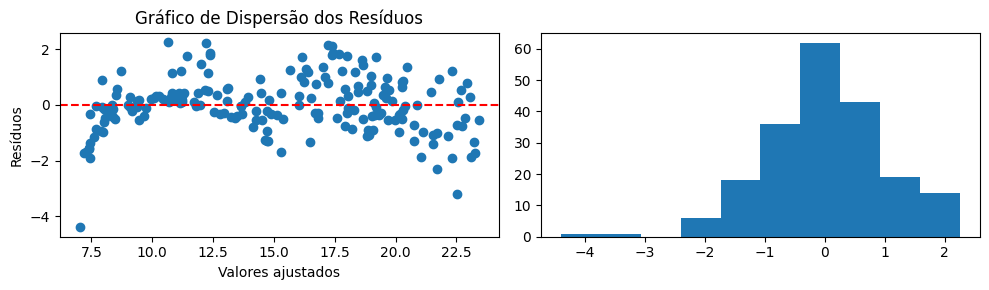

In [17]:
# Gráfico de dispersão dos resíduos

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(df["predicted"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals)

plt.tight_layout()
plt.show()

Esses gráficos sugerem que os resíduos se desenvolvem aleatoriamente em torno de zero e seguem aproximadamente uma distribuição Normal.

**Interpretação da contribuição de cada atributo na regressão linear**

Vimos que os coeficientes da reta de regressão nos indica o impacto na predição com o aumento de uma unidade na variável associada. Mas, também podemos interpretar o quanto cada atributo contribuiu no modelo de regressão. Ou seja, podemos ter uma ideia de quais atributos são mais importantes no modelo e quais não tem tanta utilidade de serem usados.

Para essa interpretação, olhamos a coluna da estatística $t$ apresentada no quadro do OLS. O valor dessa estatística é medida como

$$t_{\beta_j} = \frac{\beta_j}{\text{std err}},$$

onde a coluna $\text{std err}$ indica o desvio padrão do valor do coeficiente na estimativa da reta de regressão. Note que, quanto maior o $\beta_j$ (pensando em um caso onde os atributos estão na mesma dimensão), maior a estatística $t$ e, portanto, maior o impacto de tal atributo na qualidade do modelo de regressão ajustado. Além disso, repare no $\text{std error}$. Um valor baixo desse desvio indica que a incerteza no coeficiente ajustado é menor, pois a variação em torno desse valor é menor. Portanto, sendo essa incerteza menor, maior vai set a estatística $t$ e, portanto, maior a significância do mesmo no modelo.

No exemplo mencionado anteriormente, *TV* tem o maior impacto no modelo, sendo o *Newspaper* o atributo de menor importância. Veja abaixo um cálculo e visualização das contribuições relativas de cada atributo.

([<matplotlib.patches.Wedge at 0x7d4e8d739590>,
 [Text(-0.7963647183405738, 0.7588169972940371, 'TV'),
  Text(0.7937140515488955, -0.7615891309451818, 'Radio'),
  Text(1.099993314540864, -0.003835096531215042, 'Newspaper')],
 [Text(-0.43438075545849475, 0.413900180342202, '75.77%'),
  Text(0.43293493720848847, -0.4154122532428264, '24.12%'),
  Text(0.5999963533859258, -0.0020918708352082047, '0.11%')])

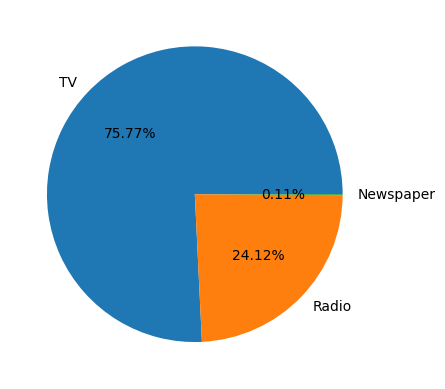

In [18]:
import matplotlib.pyplot as plt

std_error_dict = model.bse.to_dict() # Extrai os nomes dos atributos e std err e coloca em um dicionário
coeff_dict = model.params.to_dict() # Extrai os nomes dos atributos e coeficientes e coloca em um dicionário
t_names = []
t_val = []
for key in std_error_dict: # Separa os nomes e valores do dicionário
  if key != 'Intercept':
    t_names.append(key)
    t_val.append(abs(coeff_dict[key]/std_error_dict[key]))

plt.pie(t_val, labels=t_names, autopct='%0.2f%%') # Gráfico de pizza

Muito provavelmente, a remoção dele não impactaria na qualidade da reta de regressão. Vamos testar o modelo sem esse atributo e verificar a qualidade do mesmo.

In [19]:
# Fit the resgression line using 'OLS'

model = sm.ols(formula='Sales ~ TV + Radio',
               data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 29 May 2025   Prob (F-statistic):          2.39e-100
Time:                        20:26:47   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.0

Como esperado, não houve impacto na qualidade do modelo.

## Exemplo Auto MPG

Vamos agora aplicar a Regressão Linear Múltipla em um novo conjunto de dados, chamado Auto MPG. Esse conjunto de dados pode ser extraído diretamente da biblioteca *seaborn*.

Este conjunto de dados descreve o consumo de diferentes carros (medido pelo número de milhas percorridas com o uso de um galão de gasolina) com base no seguinte conjunto de características de tais carros:

- cylinders -> Número de cilíndros.

- displacement -> Capacidade do motor.

- horsepower -> Potência (cavalo-vapor).

- weight -> Peso.

- acceleration -> Tempo, em segundos, até atingir a velocidade de 100 km/h (partindo do carro em repouso).

- model_year -> Ano do modelo do carro

- origin -> Local de produção do carro.

- name -> Nome do modelo do carro.

Uma característica interessante nesse dado é que ele possui variáveis categóricas, o que traz uma interpretação diferente para o coeficiente associado a elas.

In [20]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino



Primeriamente, vamos observar a dispersão dos dados e os coeficientes de correlação.

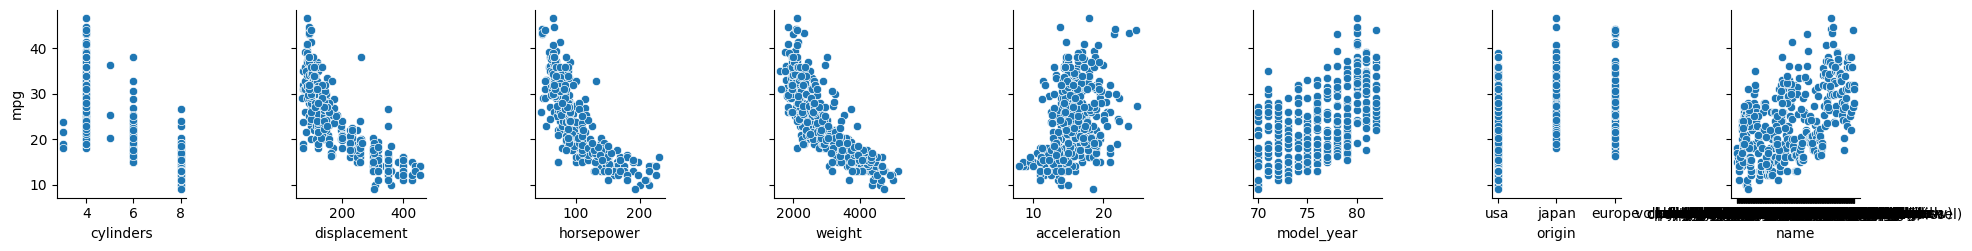

In [21]:
sns.pairplot(df,
             x_vars= df.drop('mpg', axis=1).columns,
             y_vars='mpg',
             kind='scatter')
plt.show()

In [22]:
# Correlação linear

df.drop(columns=['origin','name']).corr()[["mpg"]]

,mpg
mpg,1.000000
cylinders,-0.775396
displacement,-0.804203
horsepower,-0.778427
weight,-0.831741
acceleration,0.420289
model_year,0.579267


Note que há correlações fortes entre *mpg* e a maioria das variáveis (numéricas) preditivas.

Vamos agora aplicar a Regressão Linear Múltipla. Para as análises, vamos considerar apenas os atributos *horsepower*, *weight*, *acceleration* e *origin* como variáveis preditoras.

In [23]:
# Fit the resgression line using 'OLS'

model = sm.ols(formula='mpg ~ horsepower + weight + acceleration + origin',
               data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     197.9
Date:                Thu, 29 May 2025   Prob (F-statistic):          3.97e-104
Time:                        20:26:52   Log-Likelihood:                -1112.2
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     386   BIC:                             2260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          44.2680      2.420     

O modelo de regressão obtido foi o seguinte:

$$\widehat{y} = 44.2680 + 1.7759origin[T.japan] - 0.9766origin[T.usa] - 0.0564horsepower - 0.0048weight - 0.0309acceleration, $$

em que $\widehat{y}$ é o `mpg` esperado para certas características do carro.

No modelo de regressão, é comum deixar uma categoria como referência. Assim, a(s) outra(s) categorias mensuram o efeito de passar da categoria de referência para outra categoria.

**Em nosso exemplo:**

A variável `origin` tem três categorias: *europe*, *japan* e *usa*. Note que as variáveis que estão no modelo são *origin[T.japan]* e *origin[T.usa]*, assim, elas estão medindo como se altera a variável `origin` quando passamos de considerar o local de produção do veículo na Europa para Japão ou USA. Observe que *origin[T.japan]* tem sinal positivo, indicando que a `mpg` de veículos cuja produção é no Japão é maior quando comparada com a produção na Europa. Por outro lado, *origin[T.usa]* tem sinal negativo, indicando que a `mpg` de veículos cuja produção é nos USA é menor quando comparada com a produção na Europa.

Note também que a variável *origin[T.usa]* não é significante (valor-p > 0.05).

Na prática, quando vamos calcular `mpg` usando o modelo acima, substituimos *origin[T.japan]* por 1 se a produção foi no Japão ou zero, caso contrário. O mesmo raciocínio vale para *origin[T.usa]*.

Usando o modelo de regressão linear ajustado, qual é o valor esperado de `mpg` para veículos com as seguintes características:
- horsepower: 140
- weight: 3450
- acceleration: 11.5
- origin: japan

In [24]:
# Valores preditos pelo modelo

df['predicted'] = model.predict(df[["horsepower", "weight", "acceleration", "origin"]])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,predicted
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,18.880799
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,16.020109
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,18.107182
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,18.090632
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,18.624953


In [25]:
# Prevendo para novos valores (não estão na base de dados)

new_value=pd.DataFrame({'horsepower': [140],
                        'weight': 3450,
                        'acceleration': 11.5,
                        'origin': "japan"})

model.predict(new_value)

,0
0,21.341778


In [26]:
# Resíduos

residuals=model.resid
df["res"]=residuals

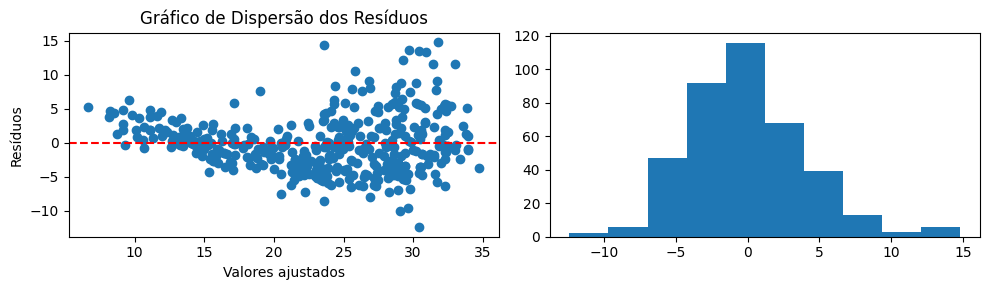

In [27]:
# Gráfico de dispersão dos resíduos

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(df["predicted"], df["res"])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals)

plt.tight_layout()
plt.show()

Esses gráficos sugerem que os resíduos se desenvolvem aleatóriamente em torno de zero e seguem aproximadamente uma distribuição Normal.

In [28]:
# Analisando possíveis outliers (fora de 2.5 vezes o desvio-padrão em relação à média)

limite = 2.5*df.res.std()
df[(df.res<-limite) | (df.res>limite)].sort_values(by=['res'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,predicted,res
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3,30.422971,-12.422971
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel),25.809875,10.590125
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl,33.017861,11.582139
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,31.433062,11.666938
309,41.5,4,98.0,76.0,2144,14.7,80,europe,vw rabbit,29.304773,12.195227
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),30.950172,13.349828
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,30.420452,13.579548
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),29.696671,13.703329
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel),23.597137,14.402863
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,31.764764,14.835236


([<matplotlib.patches.Wedge at 0x7d4e8d579910>,
 [Text(0.9576141155434835, 0.5412718408636017, 'origin[T.japan]'),
  Text(0.2566369450097591, 1.069643622173319, 'origin[T.usa]'),
  Text(-0.7826742143418828, 0.7729301871477894, 'horsepower'),
  Text(-0.08846131493149142, -1.0964372283722363, 'weight'),
  Text(1.0985523839422222, -0.05641506655903837, 'acceleration')],
 [Text(0.5223349721146273, 0.2952391859256009, '16.38%'),
  Text(0.1399837881871413, 0.5834419757309012, '9.75%'),
  Text(-0.4269132078228451, 0.42159828389879417, '22.94%'),
  Text(-0.048251626326268046, -0.5980566700212198, '49.30%'),
  Text(0.599210391241212, -0.0307718544867482, '1.63%')])

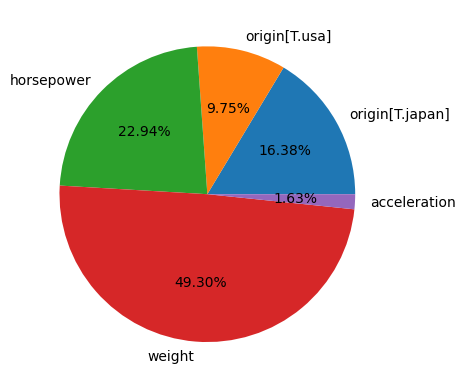

In [29]:
import matplotlib.pyplot as plt

std_error_dict = model.bse.to_dict() # Extrai os nomes dos atributos e std err e coloca em um dicionário
coeff_dict = model.params.to_dict() # Extrai os nomes dos atributos e coeficientes e coloca em um dicionário
t_names = []
t_val = []
for key in std_error_dict: # Separa os nomes e valores do dicionário
  if key != 'Intercept':
    t_names.append(key)
    t_val.append(abs(coeff_dict[key]/std_error_dict[key]))

plt.pie(t_val, labels=t_names, autopct='%0.2f%%') # Gráfico de pizza

# **Exercício: Verifiquem como fica o modelo ao transformar a variável *origin* em dummies**

In [30]:
df2 = pd.get_dummies(df, columns=['origin'])
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,predicted,res,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,18.880799,-0.880799,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,16.020109,-1.020109,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,18.107182,-0.107182,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,18.090632,-2.090632,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,18.624953,-1.624953,False,False,True


In [31]:
model = sm.ols(formula='mpg ~ horsepower + weight + acceleration + origin_europe + origin_japan + origin_usa',
               data=df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     197.9
Date:                Thu, 29 May 2025   Prob (F-statistic):          3.97e-104
Time:                        20:26:53   Log-Likelihood:                -1112.2
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     386   BIC:                             2260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                33.40

# **Vantagens e desvantagens da Regressão Linear**

**Vantagens**

- O modelo é de fácil implementação e interpretação.

- Não necessita um esforço computacional grande, uma vez que a criação do modelo é obtida de forma analítica.

- Se as suposições sobre o problema são atendidades, pode resultar em boas predições.

**Desvantagens**

- Caso as suposições não sejam atendidas, o modelo não fornecerá bons resultados.

- Consegue modelar, apenas, uma relação linear entre as variáveis de entrada e a variável de saída. Sendo assim, pode resultar em um *underfitting*, não conseguindo estabeler uma relação complexa entre os dados.

- Como não leva em consideração interações entre variáveis, a interpretação é sensível à multicolinearidade, ou seja, à presença de variáveis correlacionadas.